# <a name="0"> Clustering</a>

1. <a href="#0">Read the dataset</a>
2. <a href="#2">Data investigation</a>
3. <a href="#3">Data preprocessing </a>
4. <a href="#4">Features transformation </a>
5. <a href="#5">Training datasets</a>

### `BY: Mohamed Ahmed Saad Abohassan `

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from scipy.stats import shapiro
import seaborn as sns 
from sklearn.cluster import KMeans
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
import scipy.cluster.hierarchy as shc
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from scipy.stats import multivariate_normal
from matplotlib import pyplot

import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## 1. <a name="1">Read the dataset</a>
(<a href="#0">Go to top</a>)

First dowmload the data set from this link https://www.kaggle.com/code/sadkoktaybicici/credit-card-data-clustering-k-mean/data
then import it in python.

In [2]:
#read the data

data_path = 'CC GENERAL.csv'  #the path where you downloaded the data
df = pd.read_csv(data_path)

print('The shape of the dataset is:', df.shape)

The shape of the dataset is: (8950, 18)


## 2. <a name="2">Data investigation</a>
(<a href="#0">Go to top</a>)

in this part you need to check the data quality and assess any issues in the data as:
- null values in each column 
- each column has the proper data type
- outliers
- duplicate rows
- distribution for each column (skewness)
<br>

**comment each issue you find** 

In [3]:
# Let's see the data types and non-null values for each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-null   int64  
 12  PURCHA

In [4]:
round(df.isnull().sum(axis=0)*100/df.shape[0],2)

CUST_ID                             0.00
BALANCE                             0.00
BALANCE_FREQUENCY                   0.00
PURCHASES                           0.00
ONEOFF_PURCHASES                    0.00
INSTALLMENTS_PURCHASES              0.00
CASH_ADVANCE                        0.00
PURCHASES_FREQUENCY                 0.00
ONEOFF_PURCHASES_FREQUENCY          0.00
PURCHASES_INSTALLMENTS_FREQUENCY    0.00
CASH_ADVANCE_FREQUENCY              0.00
CASH_ADVANCE_TRX                    0.00
PURCHASES_TRX                       0.00
CREDIT_LIMIT                        0.01
PAYMENTS                            0.00
MINIMUM_PAYMENTS                    3.50
PRC_FULL_PAYMENT                    0.00
TENURE                              0.00
dtype: float64

In [5]:
# This will print basic statistics for numerical columns
df.describe()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8950.000000,8949.000000,8950.000000,8637.000000,8950.000000,8950.000000
mean,1564.474828,0.877271,1003.204834,592.437371,411.067645,978.871112,0.490351,0.202458,0.364437,0.135144,3.248827,14.709832,4494.449450,1733.143852,864.206542,0.153715,11.517318
std,2081.531879,0.236904,2136.634782,1659.887917,904.338115,2097.163877,0.401371,0.298336,0.397448,0.200121,6.824647,24.857649,3638.815725,2895.063757,2372.446607,0.292499,1.338331
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,50.000000,0.000000,0.019163,0.000000,6.000000
25%,128.281915,0.888889,39.635000,0.000000,0.000000,0.000000,0.083333,0.000000,0.000000,0.000000,0.000000,1.000000,1600.000000,383.276166,169.123707,0.000000,12.000000
50%,873.385231,1.000000,361.280000,38.000000,89.000000,0.000000,0.500000,0.083333,0.166667,0.000000,0.000000,7.000000,3000.000000,856.901546,312.343947,0.000000,12.000000
75%,2054.140036,1.000000,1110.130000,577.405000,468.637500,1113.821139,0.916667,0.300000,0.750000,0.222222,4.000000,17.000000,6500.000000,1901.134317,825.485459,0.142857,12.000000
max,19043.138560,1.000000,49039.570000,40761.250000,22500.000000,47137.211760,1.000000,1.000000,1.000000,1.500000,123.000000,358.000000,30000.000000,50721.483360,76406.207520,1.000000,12.000000


In [6]:
df.shape

(8950, 18)

In [7]:
# feel free to investigate what you want

In [8]:
df.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [9]:
df["TENURE"].unique()

array([12,  8, 11,  9, 10,  7,  6], dtype=int64)

In [10]:
df.isnull().sum()

CUST_ID                               0
BALANCE                               0
BALANCE_FREQUENCY                     0
PURCHASES                             0
ONEOFF_PURCHASES                      0
INSTALLMENTS_PURCHASES                0
CASH_ADVANCE                          0
PURCHASES_FREQUENCY                   0
ONEOFF_PURCHASES_FREQUENCY            0
PURCHASES_INSTALLMENTS_FREQUENCY      0
CASH_ADVANCE_FREQUENCY                0
CASH_ADVANCE_TRX                      0
PURCHASES_TRX                         0
CREDIT_LIMIT                          1
PAYMENTS                              0
MINIMUM_PAYMENTS                    313
PRC_FULL_PAYMENT                      0
TENURE                                0
dtype: int64

In [11]:
nulls_df = df.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count
13,CREDIT_LIMIT,1
15,MINIMUM_PAYMENTS,313


In [12]:
df.shape

(8950, 18)

In [13]:
num_columns = list(set(df.describe().columns.to_list()))
len(num_columns)

17

In [14]:
df.duplicated().sum()

0

In [15]:
              
th_count=df.shape[0]*0.5

columns_to_drop=[]
for col in num_columns :
    
    if df.groupby(by=col)['CUST_ID'].count().reset_index().sort_values(by=['CUST_ID'],ascending=False).iloc[0,1] >th_count:
            columns_to_drop.append(col)
            print(f"{col} is redondance ")

CASH_ADVANCE_TRX is redondance 
CASH_ADVANCE_FREQUENCY is redondance 
TENURE is redondance 
PRC_FULL_PAYMENT is redondance 
BALANCE_FREQUENCY is redondance 
CASH_ADVANCE is redondance 


In [16]:
columns_to_drop

['CASH_ADVANCE_TRX',
 'CASH_ADVANCE_FREQUENCY',
 'TENURE',
 'PRC_FULL_PAYMENT',
 'BALANCE_FREQUENCY',
 'CASH_ADVANCE']

In [17]:
df.shape

(8950, 18)

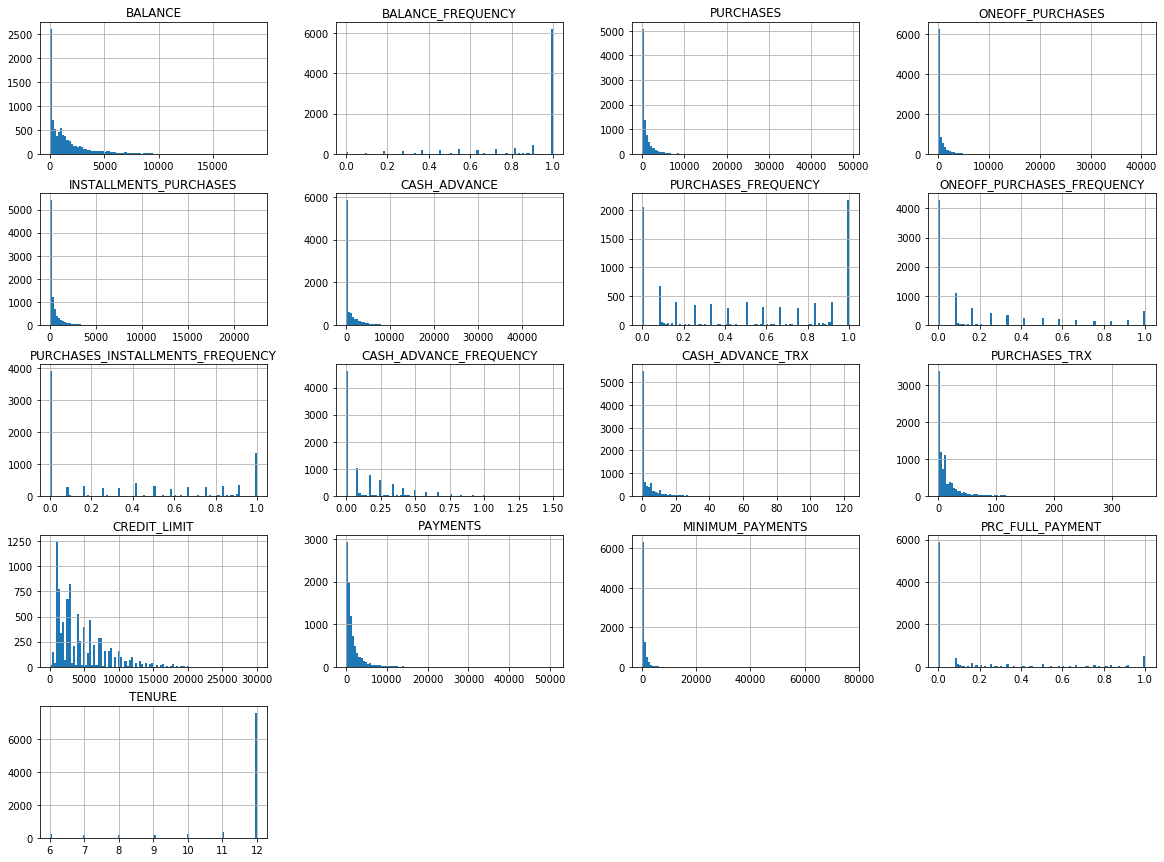

In [18]:
df.hist(bins = 100, figsize = (20, 15));

## 3. <a name="3">Data preprocessing</a>
(<a href="#0">Go to top</a>)


### Define below all the issues that you had found in the previous part
1-   there is null values at CREDIT_LIMIT and MINIMUM_PAYMENTS        <br  > 
2-    cols of   ['PRC_FULL_PAYMENT',
 'BALANCE_FREQUENCY',
 'CASH_ADVANCE_TRX',
 'CASH_ADVANCE',
 'TENURE',
 'CASH_ADVANCE_FREQUENCY'] has 50% of values with the same value      <br>
3-   dealing with outliers         <br>
4-   dealing with skewness         <br>

In [19]:
#make a copy for the original dataset
df_copy=df.copy()

### for each issue adapt this methodology 
- start by defining the solution
- apply this solution onn the data
- test the solution to make sure that you have solved the issue

**First issue**

In [20]:
#solution ---dropping nulls
df_copy = df.dropna(axis = 0, subset = ['CREDIT_LIMIT', 'MINIMUM_PAYMENTS'])


In [21]:
#test 
df_copy.head(5)

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.40,0.000000,0.166667,0.000000,0.083333,0.00,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.00,6442.945483,0.000000,0.000000,0.000000,0.25,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.00,0.000000,1.000000,1.000000,0.000000,0.00,0,12,7500.0,622.066742,627.284787,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.00,0.000000,0.083333,0.083333,0.000000,0.00,0,1,1200.0,678.334763,244.791237,0.000000,12
5,C10006,1809.828751,1.000000,1333.28,0.00,1333.28,0.000000,0.666667,0.000000,0.583333,0.00,0,8,1800.0,1400.057770,2407.246035,0.000000,12


In [22]:
nulls_df = df_copy.isna().sum().reset_index().rename(columns = { 0 : "Nulls_Count"})
nulls_df[nulls_df['Nulls_Count'] > 0]

,index,Nulls_Count


In [23]:
df_copy.shape

(8636, 18)

**Second issue**

In [24]:
#dropp the cols  which has redundance 50% of its values from the data 

In [25]:
#solution 
df_copy.drop(columns=columns_to_drop,inplace=True)

In [26]:
#test 
df_copy.head(5)

,CUST_ID,BALANCE,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS
0,C10001,40.900749,95.40,0.00,95.40,0.166667,0.000000,0.083333,2,1000.0,201.802084,139.509787
1,C10002,3202.467416,0.00,0.00,0.00,0.000000,0.000000,0.000000,0,7000.0,4103.032597,1072.340217
2,C10003,2495.148862,773.17,773.17,0.00,1.000000,1.000000,0.000000,12,7500.0,622.066742,627.284787
4,C10005,817.714335,16.00,16.00,0.00,0.083333,0.083333,0.000000,1,1200.0,678.334763,244.791237
5,C10006,1809.828751,1333.28,0.00,1333.28,0.666667,0.000000,0.583333,8,1800.0,1400.057770,2407.246035


**third issue**

In [27]:
num_columns = list(set(df_copy.describe().columns.to_list()))
len(num_columns)

11

In [28]:
#instead of dropping  ouliers we can clamping

In [29]:
##clamping_ouliers
for col in num_columns:

    Q1 = np.percentile(df_copy[col], 25) 
    
    Q3 = np.percentile(df_copy[col], 75) 
    IQR = Q3 - Q1 
    upper = Q3+1.5*IQR
    lower = Q1-1.5*IQR
    df_copy[col][df_copy[col]<lower]=lower
    df_copy[col][df_copy[col]>upper]=upper
    

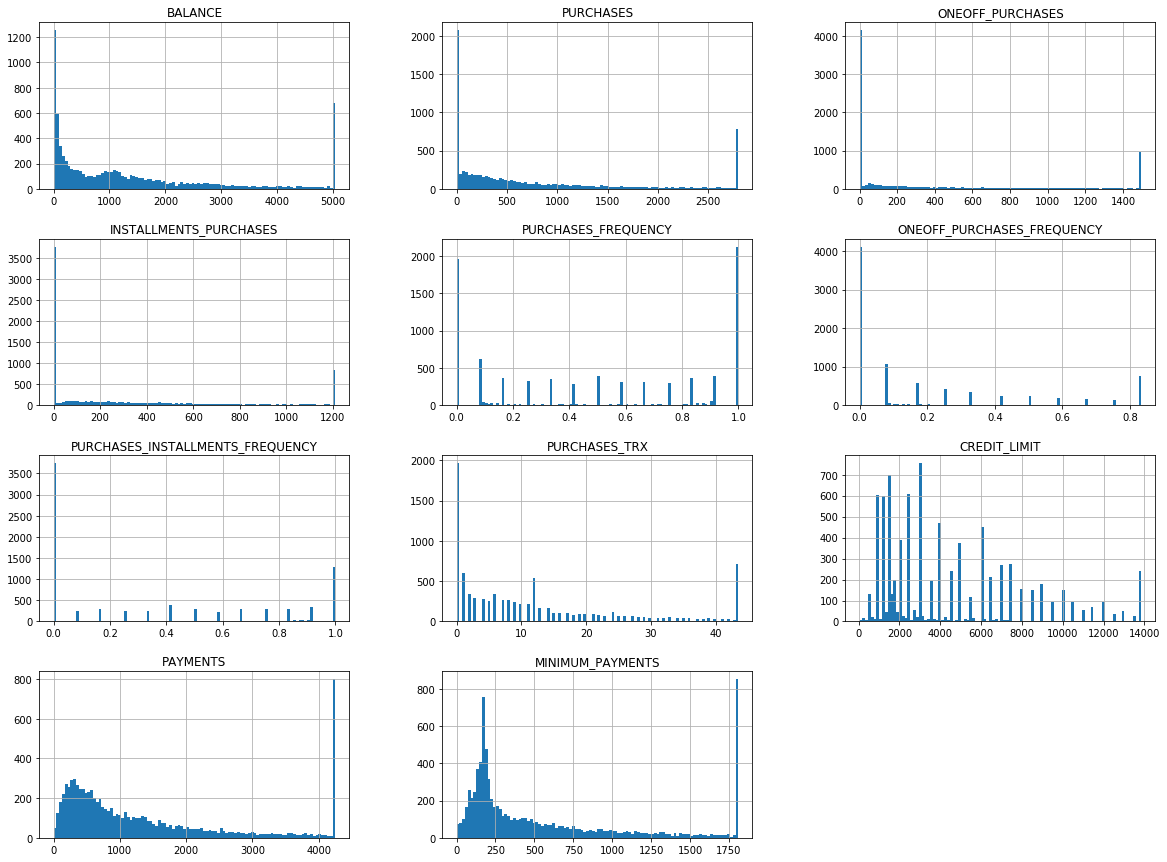

In [30]:
#test
df_copy.hist(bins = 100, figsize = (20, 15));

**4th issue**

In [31]:
# there is skewness in the data dist so we can improve it 

In [32]:
m=df_copy[num_columns].mean(axis=0)
std=df_copy[num_columns].std(axis=0)
skewed_cols = []

sk_coff=((df_copy[num_columns]-m)**3).sum(axis=0)/((df_copy.shape[0]-1)* std**3)

i=0
for col in num_columns:
    if abs(sk_coff[i]>1):
        df_copy[col]=np.log(np.abs(df_copy[col]+1))
#         X_test[col]=np.log(np.abs(X_test[col]+1))
        
        skewed_cols.append(col)
        print(f"{col} : removed skewness")
    i+=1

CREDIT_LIMIT : removed skewness
PURCHASES : removed skewness
PURCHASES_TRX : removed skewness
PAYMENTS : removed skewness
ONEOFF_PURCHASES : removed skewness
INSTALLMENTS_PURCHASES : removed skewness
BALANCE : removed skewness
ONEOFF_PURCHASES_FREQUENCY : removed skewness
MINIMUM_PAYMENTS : removed skewness


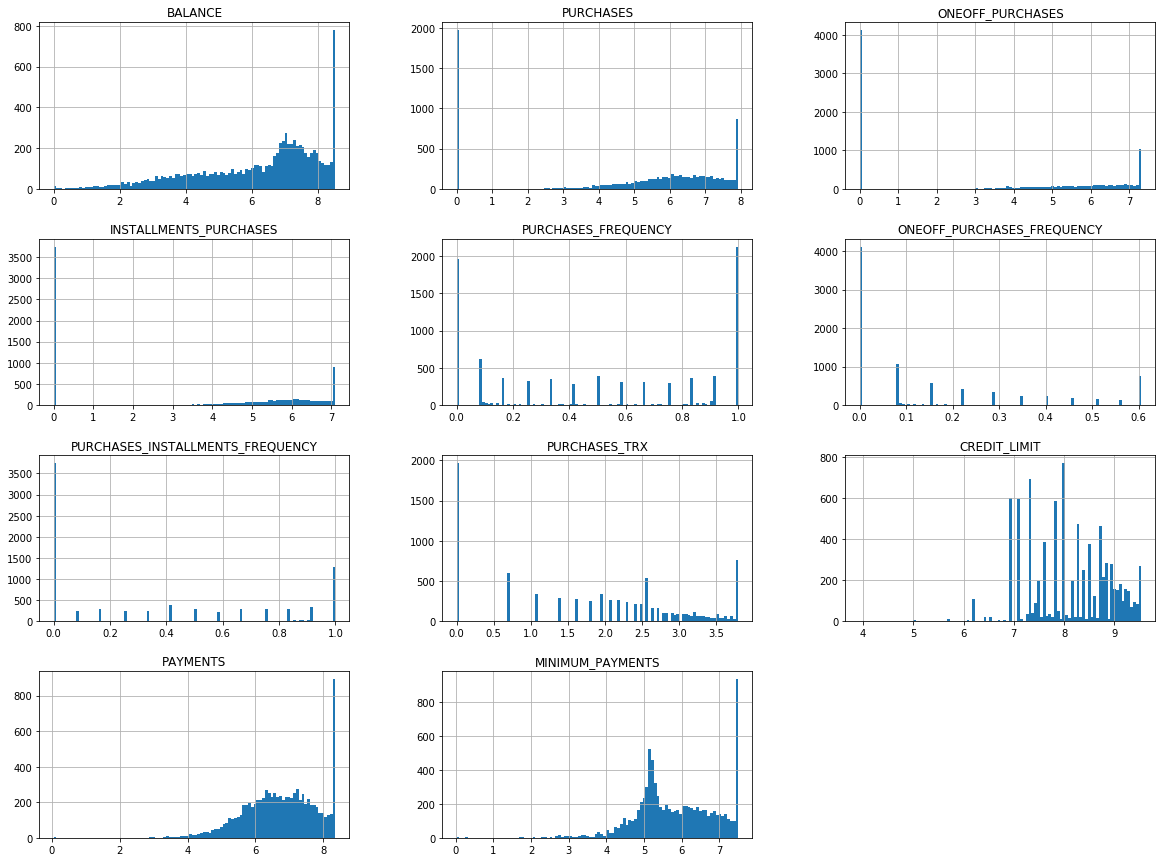

In [33]:
#test
df_copy.hist(bins = 100, figsize = (20, 15));

In [34]:
df_copy.shape

(8636, 12)

## 4. <a name="4">Features transformation</a>
(<a href="#0">Go to top</a>)

*What is the feature scaling technique that would use and why?* <br>
*return to this section again and try another technique and see how that will impact your result*<br>
for more details on different methods for scaling check these links
- https://scikit-learn.org/stable/modules/preprocessing.html#preprocessing
- https://scikit-learn.org/stable/modules/classes.html#module-sklearn.preprocessing
- https://www.analyticsvidhya.com/blog/2020/07/types-of-feature-transformation-and-scaling/

Answer here: we can test the distrubtion of the data before doing  Features transformation if the dist is normal  so doing std scale better than min max scaler and the opposite right 

In [35]:
#chick for min_max_scale or std
feats_std_scale = []
feats_min_max_scale = []
sample_data  = df_copy.sample(replace = False, n= 500)

for col in num_columns:
    stat, p = shapiro(sample_data[col])
    print('W_Statistic=%.3f, p=%.8f' % (stat, p))

    alpha = 0.001
    if p > alpha:
        print(f'{col} looks like gaussian (fail to reject H0)')
        feats_std_scale.append(col)
    else:
        print(f'{col} does not look Gaussian (reject H0)')
        feats_min_max_scale.append(col)

W_Statistic=0.973, p=0.00000006
CREDIT_LIMIT does not look Gaussian (reject H0)
W_Statistic=0.796, p=0.00000000
PURCHASES does not look Gaussian (reject H0)
W_Statistic=0.901, p=0.00000000
PURCHASES_TRX does not look Gaussian (reject H0)
W_Statistic=0.831, p=0.00000000
PURCHASES_FREQUENCY does not look Gaussian (reject H0)
W_Statistic=0.789, p=0.00000000
PURCHASES_INSTALLMENTS_FREQUENCY does not look Gaussian (reject H0)
W_Statistic=0.968, p=0.00000000
PAYMENTS does not look Gaussian (reject H0)
W_Statistic=0.745, p=0.00000000
ONEOFF_PURCHASES does not look Gaussian (reject H0)
W_Statistic=0.765, p=0.00000000
INSTALLMENTS_PURCHASES does not look Gaussian (reject H0)
W_Statistic=0.919, p=0.00000000
BALANCE does not look Gaussian (reject H0)
W_Statistic=0.723, p=0.00000000
ONEOFF_PURCHASES_FREQUENCY does not look Gaussian (reject H0)
W_Statistic=0.965, p=0.00000000
MINIMUM_PAYMENTS does not look Gaussian (reject H0)


In [36]:
df_copy_ = df_copy.drop(columns =["CUST_ID"] )


In [37]:
scaler = MinMaxScaler()
df_copy = scaler.fit_transform(df_copy_)


## 5. <a name="5">Training and hyperparamter tuning</a>
(<a href="#0">Go to top</a>)


### `EM`

In [38]:
df_copy.shape

(8636, 11)

In [39]:
rang=list(set(np.arange(8))-set([0,1]))
rang

[2, 3, 4, 5, 6, 7]

In [40]:
for i in rang:
    gm = GaussianMixture(n_components=i, random_state=0).fit(df_copy)
    pred=gm.predict(df_copy)
    score = silhouette_score(df_copy, pred)
    print(f' the score at n_clusters = {i}  is : {score}')

 the score at n_clusters = 2  is : 0.39358216557519676
 the score at n_clusters = 3  is : 0.3832042434627915
 the score at n_clusters = 4  is : 0.42277689824720555
 the score at n_clusters = 5  is : 0.40206531776867427
 the score at n_clusters = 6  is : 0.34529274378828134
 the score at n_clusters = 7  is : 0.27912626542179125


In [41]:
gm = GaussianMixture(n_components=4, random_state=0).fit(df_copy)
pred_gm=gm.predict(df_copy)

In [42]:
pd.value_counts(pred_gm)

2    2743
0    2147
3    1962
1    1784
dtype: int64

### `anomaly detection`

In [43]:
m0,m1,m2,m3=gm.means_
s0,s1,s2,s3=gm.covariances_
px_y0=multivariate_normal.pdf(df_copy,mean=m0,cov=s0).reshape((df_copy.shape[0],1))
px_y1=multivariate_normal.pdf(df_copy,mean=m1,cov=s1).reshape((df_copy.shape[0],1))
px_y2=multivariate_normal.pdf(df_copy,mean=m2,cov=s2).reshape((df_copy.shape[0],1))
px_y3=multivariate_normal.pdf(df_copy,mean=m3,cov=s3).reshape((df_copy.shape[0],1))

In [44]:
px_y=np.concatenate((px_y0,px_y1,px_y2,px_y3),axis=1)
px_y.shape

(8636, 4)

In [45]:
py=(gm.weights_).reshape((-1,1))
px=px_y@py
(px<0.2).sum()

91

In [46]:
rows= np.where(px < 0.2)[0]
rows

array([  75,  172,  186,  192,  339,  363,  364,  374,  422,  462,  584,
        620,  835,  847,  851,  874,  961,  966, 1130, 1201, 1248, 1346,
       1356, 1366, 1612, 1737, 1922, 2023, 2080, 2114, 2403, 2448, 2671,
       2999, 3184, 3191, 3200, 3392, 3427, 3471, 3565, 3649, 3741, 3749,
       3783, 3941, 4177, 4312, 4346, 4525, 4528, 4838, 4846, 4854, 4902,
       4948, 5057, 5152, 5164, 5179, 5184, 5285, 5366, 5535, 5553, 5684,
       5947, 6235, 6276, 6336, 6338, 6390, 6453, 6484, 6728, 6754, 6940,
       7070, 7102, 7327, 7499, 7570, 7632, 7636, 7788, 7926, 8113, 8243,
       8449, 8525, 8594], dtype=int64)

In [47]:
df_copy[rows]

array([[0.18365546, 0.61708248, 0.46143193, ..., 0.97441825, 0.63850352,
        0.61362102],
       [0.66183716, 1.        , 0.55481048, ..., 0.90207659, 0.93236988,
        0.69730725],
       [1.        , 0.75310563, 0.68946258, ..., 0.94188871, 0.90435246,
        0.99408192],
       ...,
       [0.71825768, 0.75184793, 0.52268821, ..., 0.53118784, 0.46415543,
        1.        ],
       [0.2506399 , 0.52472579, 0.49040292, ..., 0.40768441, 0.52818898,
        0.62198681],
       [0.72111398, 0.86354735, 0.84960306, ..., 0.60347751, 0.43759639,
        0.65033017]])

## `TSNE`

In [48]:
from sklearn.manifold import TSNE

In [49]:
X_embedded = TSNE(n_components=2, learning_rate='auto',
                   init='pca').fit_transform(df_copy)

In [50]:
X_embedded[:,0].shape

(8636,)

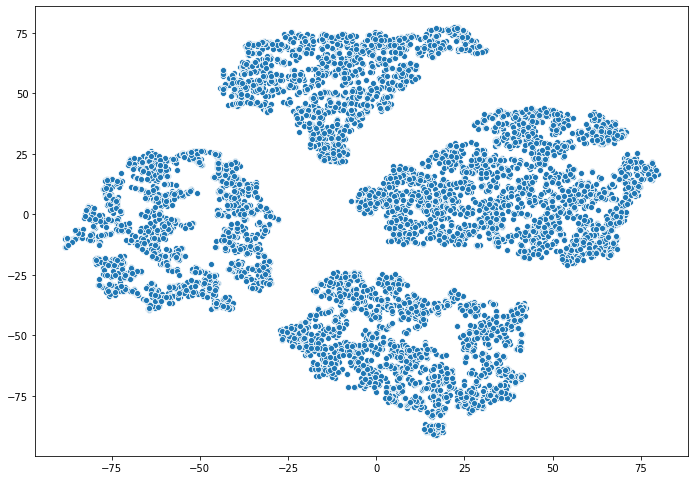

In [61]:
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=X_embedded[:,0],y=X_embedded[:,1]);

### `TSNE & EM`

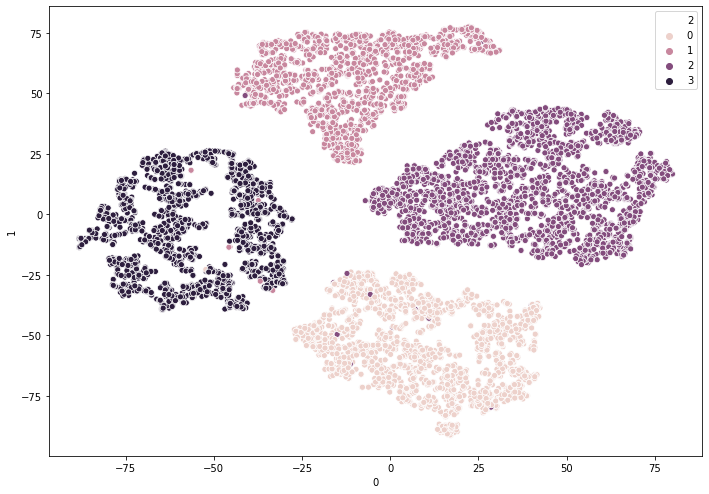

In [53]:
pred_gm=pred_gm.reshape((-1,1))
new_gm=np.concatenate((X_embedded, pred_gm),axis=1)
new_gm=pd.DataFrame(new_gm)
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=0,y=1, hue =2,data=new_gm);

### `TSNE & AgglomerativeClustering `

In [54]:
pca =PCA(n_components=2)
df_copy_pca=pca.fit_transform(df_copy)

In [55]:
from sklearn.cluster import AgglomerativeClustering


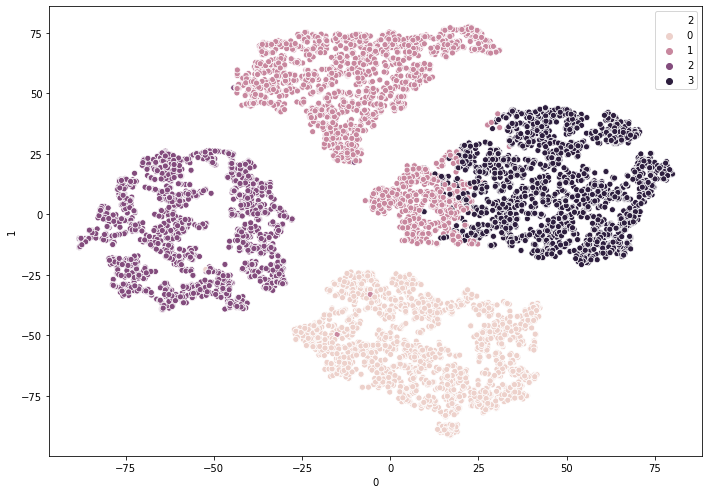

In [56]:
clustering = AgglomerativeClustering(n_clusters=4, affinity="euclidean" , linkage="ward" )
predict_h=clustering.fit_predict(df_copy_pca)
predict_h=predict_h.reshape((8636,1))
new_df_h=np.concatenate((X_embedded, predict_h),axis=1)
new_df_h=pd.DataFrame(new_df_h)
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=0,y=1, hue =2,data=new_df_h);

### `TSNE & DBSCAN`

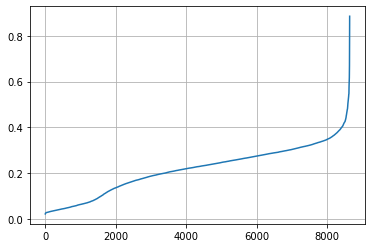

In [57]:
#2n+1
mins = 2*df_copy.shape[1]+1
nn = NearestNeighbors(n_neighbors=mins+1)

nn.fit(df_copy)

distances, neighbors = nn.kneighbors(df_copy)

distances = np.sort(distances[:, mins], axis = 0)
plt.plot(list(range(0,len(distances))),distances)
plt.grid();

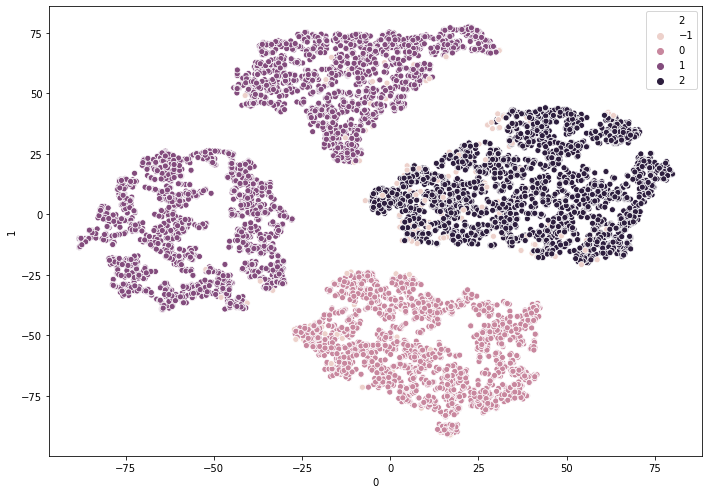

In [58]:
db = DBSCAN(eps = 0.27, min_samples = 4).fit(df_copy)
pred_db=db.labels_
pred_db=pred_db.reshape((8636,1))
new_df_db=np.concatenate((X_embedded, pred_db),axis=1)
new_df_db=pd.DataFrame(new_df_db)
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=0,y=1, hue =2,data=new_df_db);

### `TSNE & KNN `

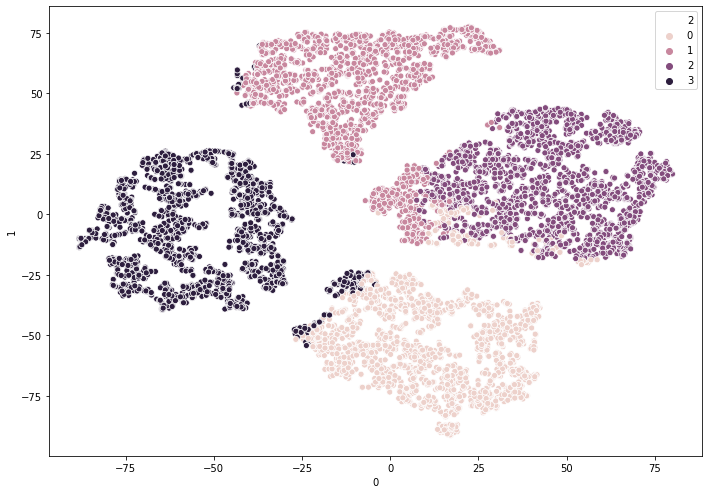

In [59]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_copy)
k_pred=kmeans.labels_
k_pred=k_pred.reshape((8636,1))
new_df_k=np.concatenate((X_embedded, k_pred),axis=1)
new_df_k=pd.DataFrame(new_df_k)
a4_dims = (11.7, 8.27)
fig, ax = pyplot.subplots(figsize=a4_dims)
sns.scatterplot(ax=ax,x=0,y=1, hue =2,data=new_df_k);